## Overview Exercises

### Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### 1. Has the network latency gone up since we switched internet service providers?

Ho: Network lactency has increased since switching ISP's.

Ha: Network latency has not increased since switching ISP's.
    
    
True Pos: Came to conclusion that network latency and switching ISP's are related.
    
True Neg: Came to conclusion that network latency and switching ISP's are not related.
    
Type I: Predicted that net latency is related to switching ISP's when they actually are not related
     
Type II: Predicted that net latency is not related to switching ISP's when they actually are related.


#### 2. Is the website redesign any good?

Ho: The website redesign has increased the conversion rate.

Ha: The website redesign has not increased the conversion rate.


True Pos: Came to conclusion that conversion rate and redesign are related and they are.

True Neg: Came to conclusion that conversion rate and redesign are not related and they are not.  

Type I: Predicted that the redesign is related to increase in conversion rate when they actually are not related
     
Type II: Predicted that the redesign is not related to increase in conversion rate when they actually are related.

#### 3. Is our television ad driving more sales?

Ho: Sales have increased since the television ad aired.

Ha: Sales have not increased since the televison ad aired.


True Pos: Came to conclusion that the televison ad and increase in sales are related and they are.

True Neg: Came to conclusion that the televison ad and increase in sales are not related and they are not.  

Type I: Predicted that the television ad is related to increase in sales when they actually are not related
     
Type II: Predicted that the television ad is not related to increase in sales when they actually are related.

## T-Test Exercises

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

#### - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

#### - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance

In [6]:
# Office 1
mean1 = 90
std1 = 15
sales1 = 40

# Office 2
mean2 = 100
std2 = 20
sales2 = 50

alpha = .05

<AxesSubplot:>

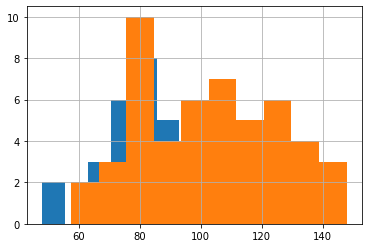

In [7]:
# Plot a histogram of both?
office1 = pd.Series(stats.norm(mean1,std1).rvs(sales1))
office1.hist()

office2 = pd.Series(stats.norm(mean2,std2).rvs(sales2))
office2.hist()


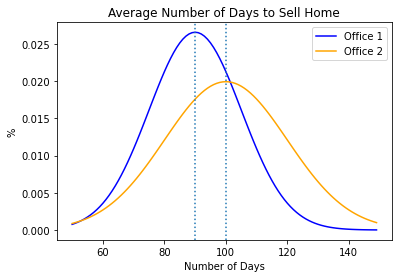

In [9]:
#Visualize two distributions:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')
#Axis vertical line at mean
plt.axvline(90, ls = ':')
plt.axvline(100, ls= ':')

plt.ylabel('%')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

In [ ]:
# Hypothesis:

# H0 = There is no difference between the average sale time it takes 
# to sell homes between Office #1 and Office #2.

# Ha = There is a difference between the average sale time it takes 
# to sell homes between Office #1 and Office #2.



In [41]:
# Assumptions:

# Normal Dist?
# Independent?
# Variance? 
var1 = std1 ** .5
var2 = std2 ** .5

var1 == var2

False

In [4]:
# T-Test
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p


(-2.7091418459143854, 0.00811206270346016)

In [11]:
#Reject of fail to reject
#Two-tail test (= vs !=) so t doesn't matter
if p < alpha:
    print('Reject the H0, my good man!')
else:
    print('Fail to reject the H0, my good man!')

Reject the H0, my good man!


### Cars Cars Cars!!! 

In [16]:
from pydataset import data
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [17]:
# Avg of Cty and Hwy = avg_mpg
mpg['avg_mpg'] = (mpg['cty'] + mpg['hwy'])/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [19]:
# Specify cars from 2008 and 1999
cars_2008 = mpg[mpg.year == 2008].avg_mpg
cars_1999 = mpg[mpg.year == 1999].avg_mpg

<AxesSubplot:>

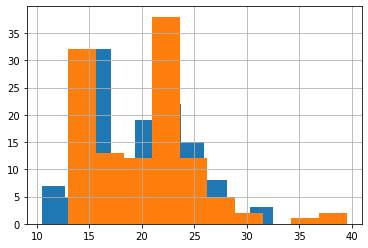

In [40]:
#Hist Viz
cars_2008.hist()
cars_1999.hist()

In [ ]:
# Set Hypothesis:

# H0: Average MPG for 2008 cars = average mpg for 1999 cars.
# Ha: Average Mpg for 2008 cars != average mpg for 1999 cars.

In [86]:
# How big is the sample size? >30?
cars_2008.count(), cars_1999.count()

(117, 117)

In [85]:
# Variance? Yep.
cars_2008.var(), cars_1999.var()

(24.097480106100797, 27.122605363984682)

In [138]:
alpha = .05

t, p = stats.ttest_ind(cars_2008, cars_1999, equal_var=False)

t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

In [139]:
print('is p/2 < alpha?', p/2 < alpha)
print('is t>0?', t>0)

is p/2 < alpha? False
is t>0? False


In [24]:
if (p/2 < alpha) & (t > 0):
    print("Hear ye, hear ye! We reject the null hypothesis!")
else:
    print("Hear ye, hear ye! We fail to reject the null hypothesis!")

Hear ye, hear ye! We fail to reject the null hypothesis!


In [25]:
#Average mpg of both are roughly the same.
cars_2008.mean(), cars_1999.mean()

(20.076923076923077, 20.22222222222222)

### Are compact cars more fuel-efficient than the average car?

In [26]:
# Set Hypothesis:

# H0: Average MPG for compacts = average mpg for all cars.
# Ha: Average Mpg for compacts > average mpg for all cars.

In [29]:
compact_mpg = mpg[mpg['class'] == 'compact'].avg_mpg
average_mpg = mpg.avg_mpg.mean()

<AxesSubplot:>

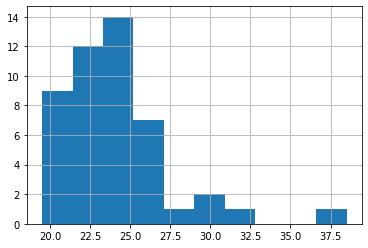

In [30]:
compact_mpg.hist()

In [31]:
#Calculate t and p.
# args: observed_values(compact_mpg) and population mean(average_mean)
alpha = .05
t, p = stats.ttest_1samp(compact_mpg, average_mpg)
t, p, alpha

(7.896888573132535, 4.1985637943171336e-10, 0.05)

In [32]:
if (p/2 < 0.05) & (t > 0):
     print("My good SIR!.. We REJECT the null hypothesis! Hub-bub-bub!!!")
else:
     print("My good SIR!.. We FAIL to reject the null hypothesis! HMM!!!")

My good SIR!.. We REJECT the null hypothesis! Hub-bub-bub!!!


### Do manual cars get better gas mileage than automatic cars?

In [134]:
# Set Hypothesis:

# H0: Average MPG for manuals = average mpg for autos.
# Ha: Average Mpg for manuals > average mpg for autos.

In [33]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg

(<AxesSubplot:>, <AxesSubplot:>)

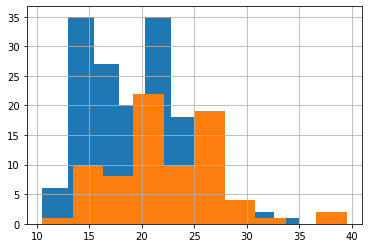

In [34]:
mpg_auto.hist(), mpg_manual.hist()

In [35]:
# Normal Dist? Assuming...
# Independent? Yep.
# Variance?
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [36]:
# Levene test returns p-value. small p means unequal variances
# p above .05, I cannt assert there is a difference in variances
stats.levene(mpg_auto, mpg_manual)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [37]:
alpha = .05
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var = False)
t, p, alpha

(4.443514012903071, 1.795224899991793e-05, 0.05)

In [39]:
if p/2 < alpha:
    print('Reject that H0!')
else:
    print('Fail to reject that H0!')

Reject that H0!


## Correlation Exercises

### Use the telco_churn data. 

In [92]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(pd.read_csv('Project Data - Storytelling.csv'))

df = df.dropna(how = 'any')

df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_name,internet_service,internet_service_name,contract_type,...,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,type_of_service(s),Tenure Group
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,9.04,No,True,False,True,True,True,3,Phone and Internet,Silver(Less Than 5 Years)
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,9.06,No,False,False,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,3.80,Yes,False,True,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)
3,0011-IGKFF,Male,1,Yes,No,1,One Line,2,Fiber Optic,0,...,12.63,Yes,False,True,True,True,True,1,Phone and Internet,Silver(Less Than 5 Years)
4,0013-EXCHZ,Female,1,Yes,No,1,One Line,2,Fiber Optic,0,...,3.19,Yes,True,True,True,True,True,1,Phone and Internet,Silver(Less Than 5 Years)


### Does tenure correlate with monthly charges? 

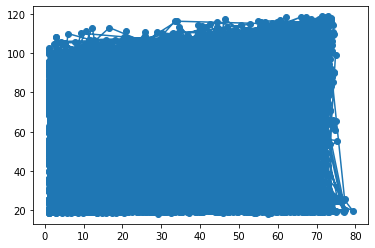

In [66]:
x = df.tenure
y = df.monthly_charges

plt.plot(x,y, marker = 'o')

# HAHAHAHAHAHA!!!!

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

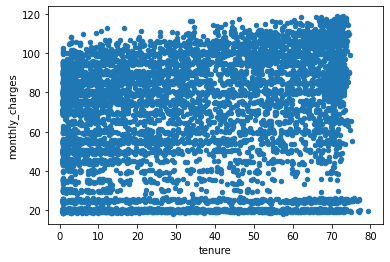

In [69]:
df.plot.scatter(y='monthly_charges',x='tenure')

In [48]:
r,p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)

r =  0.24720314527082857
p =  1.2383857251259759e-98


#### Conclusion: The null hypothesis is rejected considering there is no linear relationship between tenure and monthly charges.

### Tenure with total charges? 

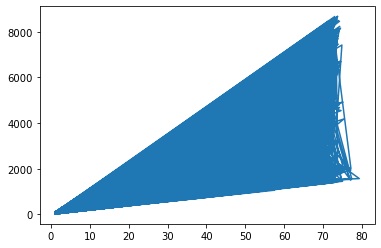

In [75]:
x = df.tenure
y = df.total_charges


plt.plot(x, y)

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

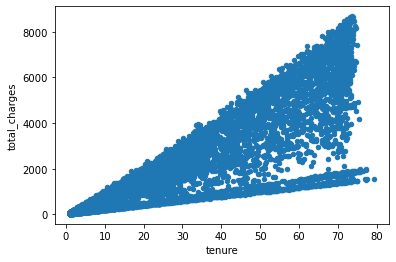

In [70]:
df.plot.scatter(y='total_charges',x='tenure')

In [54]:
df.dtypes

customer_id                object
gender                     object
is_senior_citizen           int64
partner                    object
dependents                 object
phone_service               int64
phone_service_name         object
internet_service            int64
internet_service_name      object
contract_type               int64
contract_type_name         object
payment_type               object
monthly_charges           float64
total_charges             float64
tenure                    float64
churn                      object
is_female                    bool
has_churned                  bool
has_phone                    bool
has_internet                 bool
has_phone_and_internet       bool
partner_dependents          int64
type_of_service(s)         object
Tenure Group               object
dtype: object

In [63]:
r,p = stats.pearsonr(x,y)

print('r = ', r)
print('p = ', p)

r =  0.8258264075067474
p =  0.0


Conclusion: The null hypothesis is not rejected considering there seems to be a linear relationship between tenure and total charges.

### What happens if you control for phone and internet service?

### Monthly charges vs tenure while controlling  type of service

In [147]:
# Reminder: Don't EVER use () while cleaning data!

df = df.rename(columns = {'type_of_service(s)': 'type_of_service'})
df.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,phone_service_name,internet_service,internet_service_name,contract_type,...,tenure,churn,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,type_of_service,Tenure Group
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,9.04,No,True,False,True,True,True,3,Phone and Internet,Silver(Less Than 5 Years)
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,9.06,No,False,False,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,3.80,Yes,False,True,True,True,True,0,Phone and Internet,Silver(Less Than 5 Years)


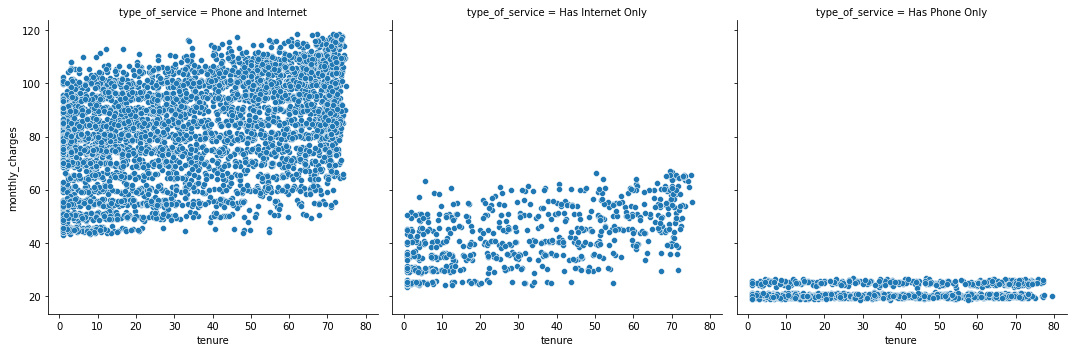

In [148]:
sns.relplot(data = df, y='monthly_charges',x='tenure', col='type_of_service')

In [149]:
phone = df.has_phone
internet = df.has_phone
phone_and_internet = df.has_phone_and_internet

In [152]:
# H0: There is no linear relationship between monthly charges and tenure
# Ha: There IS a linear relationship between monthly charges and tenure


r, p = stats.pearsonr(df[phone].tenure, df[phone].monthly_charges)
print('phone')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[internet].tenure, df[internet].monthly_charges)
print('internet')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[phone_and_internet].tenure, df[phone_and_internet].monthly_charges)
print('phone_and_internet')
print(' r = ',r)
print(' p = ',p)

phone
 r =  0.24321534888261287
 p =  2.9437136259457424e-86
internet
 r =  0.24321534888261287
 p =  2.9437136259457424e-86
phone_and_internet
 r =  0.4434241082333389
 p =  4.958966874496502e-232


### Conclusion:
#### Considering a p-value above our alpha of .05 for all three types of services, we fail to reject the null hypothesis for each. There is also a weak correlation between each type of service and monthly charges. 

### Total charges vs tenure while controlling  type of service

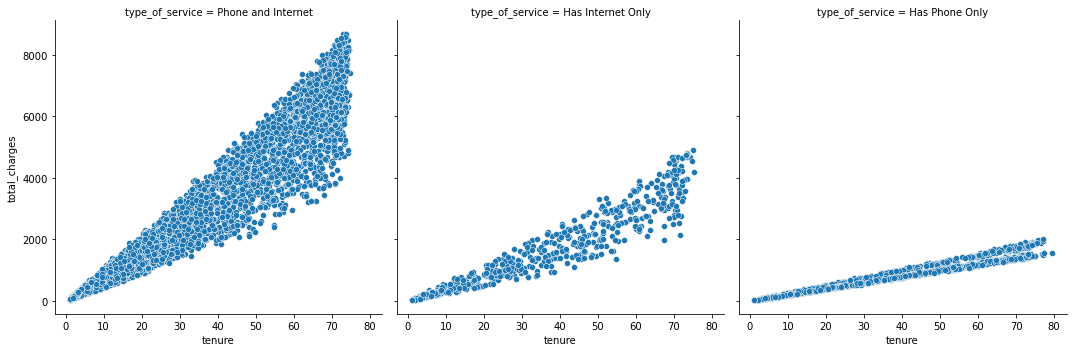

In [154]:
sns.relplot(data = df, y='total_charges',x='tenure', col='type_of_service')

In [153]:
# H0: There is no linear relationship between total charges and tenure
# Ha: There IS a linear relationship between total charges and tenure


r, p = stats.pearsonr(df[phone].tenure, df[phone].total_charges)
print('phone')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[internet].tenure, df[internet].total_charges)
print('internet')
print(' r = ',r)
print(' p = ',p)

r, p = stats.pearsonr(df[phone_and_internet].tenure, df[phone_and_internet].total_charges)
print('phone_and_internet')
print(' r = ',r)
print(' p = ',p)

phone
 r =  0.8297292833316557
 p =  0.0
internet
 r =  0.8297292833316557
 p =  0.0
phone_and_internet
 r =  0.9587695434575534
 p =  0.0


### Conclusion:
#### Considering a p-value below our alpha of .05 for all three types of services, we can reject the null hypothesis for each. There is also a  strong correlation between each type of service and monthly charges. 

### Use the employees database.

#### Is there a relationship between how long an employee has been with the company and their salary?